# Simple example R code for making circos plots in notebooks

In [ ]:
library('circlize')

In [2]:
set.seed(999)
n = 1000
a = data.frame(factor = sample(letters[1:8], n, replace = TRUE),
x = rnorm(n), y = runif(n))

Warning message in .self$filter(opt_value):
"'gap.degree' can only be modified before `circos.initialize`,
or maybe you forgot to call `circos.clear` in your last plot.
"Warning message in .self$filter(opt_value):
"'start.degree' can only be modified before `circos.initialize`,
or maybe you forgot to call `circos.clear` in your last plot.
"Warning message in .self$filter(opt_value):
"'clock.wise' can only be modified before `circos.initialize`,
or maybe you forgot to call `circos.clear` in your last plot.
"

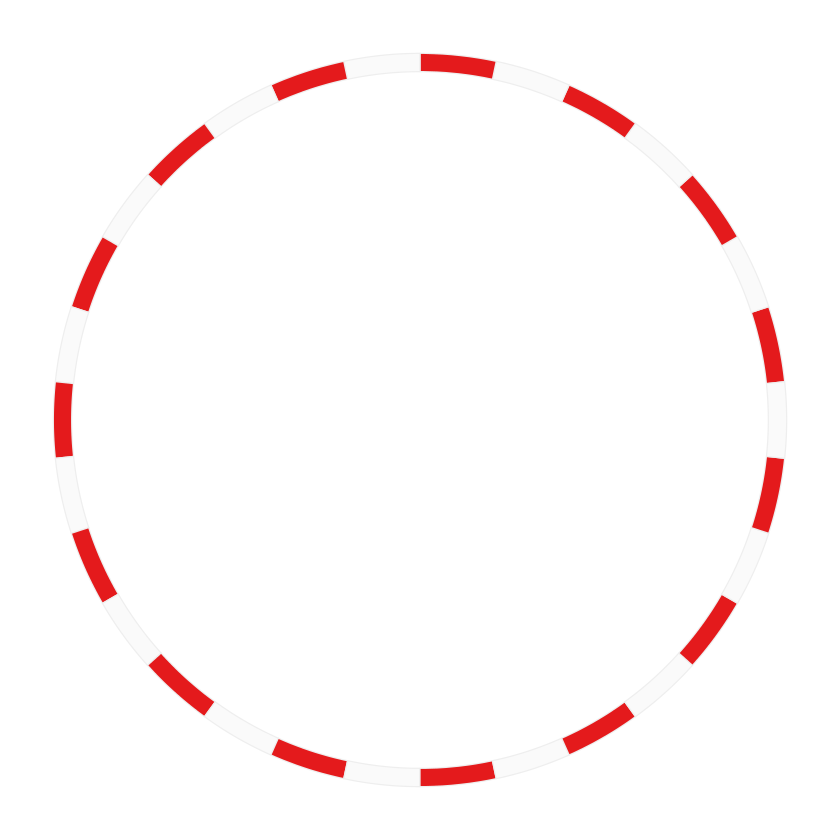

In [ ]:
num_sectors <- 30
factors = 1:num_sectors # just indicate there are 20 sectors
circos.par(gap.degree = 0, cell.padding = c(0, 0, 0, 0),
start.degree = 360/num_sectors/2, track.margin = c(0, 0), clock.wise = FALSE)
circos.initialize(factors = factors, xlim = c(0, 1))
# circos.trackPlotRegion(ylim = c(0, 1), factors = factors, bg.col = "black",
# track.height = 0.15)
# circos.trackText(rep(0.5, num_sectors), rep(0.5, num_sectors),
#labels = c(13, 4, 18, 1, 20, 5, 12, 9, 14, 11, 8, 16, 7, 19, 3, 17, 2, 15, 10, 6),
# factors = factors, col = "#EEEEEE", font = 2, facing = "downward")
circos.trackPlotRegion(ylim = c(0, 1), factors = factors,
bg.col = rep(c("#E41A1C", "#FAFAFA"), num_sectors/2), bg.border = "#EEEEEE", track.height = 0.05)